In [1]:
# idea of how temporal memory would work

# get an input, which is a set of distributed representations
# note - use SDR to convert MNITS to distributed representations


In [16]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
rcParams['figure.figsize'] = (12,6)

import numpy as np
import pandas as pd
import seaborn as sns

import os
from data_loader import *



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading Data

In [15]:
# call data loader previously to create datasets
train, val, test = load_data(n=10)
len(train[1]), len(val[1]), len(test[1])

(100, 10000, 10000)

In [19]:
train[0][0][200:210]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.5       , 0.99609375, 0.99609375, 0.25      , 0.        ],
      dtype=float32)

In [17]:
train[1][:10]

[5, 3, 9, 1, 3, 6, 9, 2, 6, 8]

## Retesting pooler approach

In [21]:
from pooler import *

clf = Classifier()
clf.learn(train)

val_acc = clf.get_accuracy(val)
val_acc

0.7125

In [34]:
model = clf

## What can I use?

In [31]:
img = train[0][4]
img.shape

(784,)

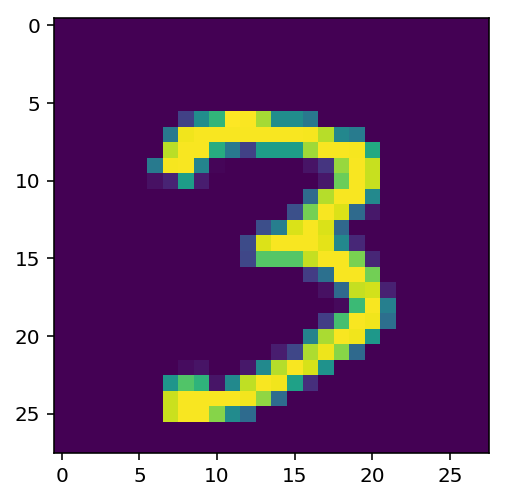

In [32]:
plt.imshow(img.reshape(28,28))

In [41]:
# don't need the classifier, all its doing is building unions
pooler = SpatialPooler()
sdr = pooler.forward(img)
torch.sum(sdr), torch.max(sdr), torch.min(sdr)

(tensor(80), tensor(1, dtype=torch.uint8), tensor(0, dtype=torch.uint8))

In [42]:
# get a sequence of mnist digits represented as sdrs

In [60]:
# get a sequence to be passed into temporal memory
labels = []
inputs = []
not_complete, num = False, 0
while True:
    # find one sample of each
    for idx, label in enumerate(test[1]):
        if label == num:
            inputs.append(test[0][idx])
            labels.append(test[1][idx]) # just a sanity check
            num += 1
            break
    # only goes to 9
    if num == 10:
        break

labels, len(inputs), inputs[0].shape

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 10, (784,))

## Build TM

In [1]:
x = inputs[0]; x.shape

NameError: name 'inputs' is not defined

In [97]:
from pooler import *
pooler = SpatialPooler()
indices = pooler.forward(x)

In [98]:
indices.shape

torch.Size([200])

In [94]:
permanences = torch.randn(10,10)
torch.max(permanences, dim=0)

torch.return_types.max(
values=tensor([2.3056, 0.3440, 1.1147, 1.3717, 1.3713, 1.5071, 1.3682, 0.6897, 0.8790,
        1.9509]),
indices=tensor([8, 6, 2, 9, 4, 3, 1, 7, 3, 0]))

In [101]:
torch.eye(10,10) == 0

tensor([[0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 0]], dtype=torch.uint8)

In [ ]:
poo

In [6]:
import torch

In [7]:
# initiate a second layer 100 columns, 10 cells per column
memory = torch.randn((100,10))

In [8]:
t = torch.tensor(range(1,101))

In [9]:
t2 = t.view(10,10)

In [10]:
t2[[3,4]]

tensor([[31, 32, 33, 34, 35, 36, 37, 38, 39, 40],
        [41, 42, 43, 44, 45, 46, 47, 48, 49, 50]])

In [11]:
torch.sum(t2, dim=1)

tensor([ 55, 155, 255, 355, 455, 555, 655, 755, 855, 955])

In [12]:
t2

tensor([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
        [ 11,  12,  13,  14,  15,  16,  17,  18,  19,  20],
        [ 21,  22,  23,  24,  25,  26,  27,  28,  29,  30],
        [ 31,  32,  33,  34,  35,  36,  37,  38,  39,  40],
        [ 41,  42,  43,  44,  45,  46,  47,  48,  49,  50],
        [ 51,  52,  53,  54,  55,  56,  57,  58,  59,  60],
        [ 61,  62,  63,  64,  65,  66,  67,  68,  69,  70],
        [ 71,  72,  73,  74,  75,  76,  77,  78,  79,  80],
        [ 81,  82,  83,  84,  85,  86,  87,  88,  89,  90],
        [ 91,  92,  93,  94,  95,  96,  97,  98,  99, 100]])

In [13]:
t2[1, 9] = 20
t2

tensor([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
        [ 11,  12,  13,  14,  15,  16,  17,  18,  19,  20],
        [ 21,  22,  23,  24,  25,  26,  27,  28,  29,  30],
        [ 31,  32,  33,  34,  35,  36,  37,  38,  39,  40],
        [ 41,  42,  43,  44,  45,  46,  47,  48,  49,  50],
        [ 51,  52,  53,  54,  55,  56,  57,  58,  59,  60],
        [ 61,  62,  63,  64,  65,  66,  67,  68,  69,  70],
        [ 71,  72,  73,  74,  75,  76,  77,  78,  79,  80],
        [ 81,  82,  83,  84,  85,  86,  87,  88,  89,  90],
        [ 91,  92,  93,  94,  95,  96,  97,  98,  99, 100]])

In [14]:
import torch

In [15]:
val, indices = torch.topk(t2, 1)
indices

tensor([[9],
        [9],
        [9],
        [9],
        [9],
        [9],
        [9],
        [9],
        [9],
        [9]])

In [16]:
val

tensor([[ 10],
        [ 20],
        [ 30],
        [ 40],
        [ 50],
        [ 60],
        [ 70],
        [ 80],
        [ 90],
        [100]])

In [42]:
t2

tensor([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
        [ 11,  12,  13,  14,  15,  16,  17,  18,  19,  20],
        [ 21,  22,  23,  24,  25,  26,  27,  28,  29,  30],
        [ 31,  32,  33,  34,  35,  36,  37,  38,  39,  40],
        [ 41,  42,  43,  44,  45,  46,  47,  48,  49,  50],
        [ 51,  52,  53,  54,  55,  56,  57,  58,  59,  60],
        [ 61,  62,  63,  64,  65,  66,  67,  68,  69,  70],
        [ 71,  72,  73,  74,  75,  76,  77,  78,  79,  80],
        [ 81,  82,  83,  84,  85,  86,  87,  88,  89,  90],
        [ 91,  92,  93,  94,  95,  96,  97,  98,  99, 100]])

In [50]:
vals, indices = torch.topk(t2, 3)

In [51]:
vals

tensor([[ 10,   9,   8],
        [ 20,  19,  18],
        [ 30,  29,  28],
        [ 40,  39,  38],
        [ 50,  49,  48],
        [ 60,  59,  58],
        [ 70,  69,  68],
        [ 80,  79,  78],
        [ 90,  89,  88],
        [100,  99,  98]])

In [52]:
indices

tensor([[9, 8, 7],
        [9, 8, 7],
        [9, 8, 7],
        [9, 8, 7],
        [9, 8, 7],
        [9, 8, 7],
        [9, 8, 7],
        [9, 8, 7],
        [9, 8, 7],
        [9, 8, 7]])

In [57]:
torch.scatter(t2, 2, indices)

TypeError: scatter() received an invalid combination of arguments - got (Tensor, int, Tensor), but expected one of:
 * (Tensor input, int dim, Tensor index, Tensor src)
 * (Tensor input, int dim, Tensor index, Number value)


In [60]:
vals, indices = torch.kthvalue(t2,3)

In [61]:
vals

tensor([ 3, 13, 23, 33, 43, 53, 63, 73, 83, 93])

In [62]:
vals.view(t2.shape)

RuntimeError: shape '[10, 10]' is invalid for input of size 10

In [71]:
vals.view(-1,1)

tensor([[ 3],
        [13],
        [23],
        [33],
        [43],
        [53],
        [63],
        [73],
        [83],
        [93]])

In [72]:
t2 > vals.view(-1,1)

tensor([[0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]], dtype=torch.uint8)

In [20]:
(val > 10).float().squeeze()

tensor([0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
# better to do using masks
# more intuitive to undertan

In [ ]:
vals.view(1,-1)

#### Time to test it

In [549]:
import torch
from pooler import TemporalPooler
pooler = TemporalPooler(input_size=3, num_columns=4, k_percent=0.4, num_cells=2)

In [551]:
# input size 3, num columns 4
pooler.proximal

tensor([[0.0000, 0.0000, 0.0000, 0.0000],
        [0.3756, 0.0000, 0.0000, 0.7734],
        [0.4944, 0.3294, 0.4092, 0.0000]])

In [553]:
pooler.distal # num columns 4, num cells 2, 8x8 matrix

tensor([[0.0000, 0.0000, 0.2164, 0.0000, 0.0000, 0.0000, 0.5281, 0.4638],
        [0.4559, 0.0000, 0.6079, 0.0000, 0.0000, 0.4573, 0.0000, 0.0000],
        [0.4433, 0.3906, 0.0000, 0.0000, 0.6121, 0.6561, 0.0000, 0.5248],
        [0.5835, 0.0000, 0.0000, 0.0000, 0.0000, 0.5094, 0.4238, 0.3544],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6286, 0.0000, 0.6196],
        [0.5780, 0.0000, 0.0000, 0.6755, 0.3939, 0.0000, 0.0000, 0.5605],
        [0.5663, 0.0000, 0.0000, 0.0000, 0.6157, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6246, 0.4775, 0.0000]])

In [555]:
inputs = [[0,0,1], [1,1,0], [0,0,0], [1,1,1]]
inputs = [torch.tensor(i) for i in inputs]

for i in inputs:
    a,b,c = pooler.forward(i)

0
1
0
1


In [288]:
from pooler import TemporalPooler
pooler = TemporalPooler(input_size=3, num_columns=4, k_percent=0.6, num_cells=2)
input_sdr = torch.tensor([1, 1, 1])
self = pooler

In [290]:
# proximal input size 3, num columns 4
# num columns 4, num cells 2, 8x8 matrix
spatial_overlap = self.proximal * input_sdr.view(-1,1).float()
active_proximal = spatial_overlap > self.perm_threshold
# count sum synapses per column
total_proximal = torch.sum(active_proximal, dim=0)
# select topk columns
kthvalue = self.num_columns - self.k
vals, _ = torch.kthvalue(total_proximal, kthvalue)
# selected columns as a binary masl
selected_cols = (total_proximal > vals.view(-1,1)).squeeze()


In [292]:
selected_cols

tensor([0, 0, 1, 0], dtype=torch.uint8)

In [426]:
# select permanences above threshold
active_distal = self.distal > self.perm_threshold
# sum them per cell - have a list of cells which are active per column
total_distal = torch.sum(active_distal, dim=0).float()
# reshape them into a format of column x cell
distal_cells = total_distal.view(self.num_columns, self.num_cells)
# pick the top1, per column - some might be zero, so I will add some random component
epsilon = torch.abs(torch.rand(distal_cells.shape)) * 0.001
distal_cells += epsilon
#
vals, indices = torch.kthvalue(distal_cells, 1)
# predictive cells include even the ones bursting
predictive_cells = (distal_cells > vals.view(-1,1)).squeeze()
# predictive cols as a mask
predictive_cols = vals > 0.001
# fired cells doesn't include bursting cells
firing_cells = predictive_cells & predictive_cols.view(-1, 1)

In [324]:
total_distal.long()

tensor([0, 1, 2, 1, 1, 1, 3, 1])

In [326]:
active_distal

tensor([[0, 0, 1, 1, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 0, 1, 0]], dtype=torch.uint8)

In [328]:
total_distal.long()

tensor([0, 1, 2, 1, 1, 1, 3, 1])

In [330]:
distal_cells

tensor([[6.7212e-05, 1.0005e+00],
        [2.0000e+00, 1.0004e+00],
        [1.0005e+00, 1.0009e+00],
        [3.0004e+00, 1.0007e+00]])

In [332]:
vals.view(-1,1)

tensor([[6.7212e-05],
        [1.0004e+00],
        [1.0005e+00],
        [1.0007e+00]])

In [388]:
predictive_cells

tensor([[0, 1],
        [1, 0],
        [0, 1],
        [1, 0]], dtype=torch.uint8)

In [390]:
predictive_cols

tensor([0, 1, 1, 1], dtype=torch.uint8)

In [402]:
# only cells that actually fired
predictive_cells & predictive_cols.view(-1, 1)

tensor([[0, 0],
        [1, 0],
        [0, 1],
        [1, 0]], dtype=torch.uint8)

In [338]:
temporal_overlap = predictive_cols & selected_cols

In [547]:
temporal_overlap

tensor([0, 0, 1, 0], dtype=torch.uint8)

In [342]:
distal_cells

tensor([[6.7212e-05, 1.0005e+00],
        [2.0000e+00, 1.0004e+00],
        [1.0005e+00, 1.0009e+00],
        [3.0004e+00, 1.0007e+00]])

In [350]:
distal_cells[temporal_overlap]

tensor([[1.0005, 1.0009]])

In [416]:
increase_cells = predictive_cells & temporal_overlap.view(-1,1)
increase_cells

tensor([[0, 0],
        [0, 0],
        [1, 0],
        [0, 0]], dtype=torch.uint8)

In [428]:
firing_cells

tensor([[0, 0],
        [1, 0],
        [1, 0],
        [1, 0]], dtype=torch.uint8)

In [430]:
decrease_cells = firing_cells & (temporal_overlap.view(-1,1) == 0)
decrease_cells

tensor([[0, 0],
        [1, 0],
        [0, 0],
        [1, 0]], dtype=torch.uint8)

In [376]:
increase = (selected_cells.view(-1).float() * self.perm_increase).view(1, -1)
increase

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0500, 0.0000, 0.0000]])

In [366]:
self.distal

tensor([[0.0000, 0.4286, 0.6102, 0.5415, 0.0000, 0.0000, 0.5585, 0.3436],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2902, 0.0000, 0.0000, 0.0000, 0.4090, 0.0000, 0.0000, 0.4200],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6527, 0.0000, 0.3823],
        [0.0000, 0.0000, 0.0000, 0.3541, 0.0000, 0.0000, 0.5452, 0.5590],
        [0.4373, 0.4916, 0.6383, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.4611, 0.4999, 0.0000, 0.4672],
        [0.0000, 0.5166, 0.4872, 0.4154, 0.5270, 0.4588, 0.6296, 0.0000]])

In [382]:
zero_mask = (self.distal > 0).float()
new_distal = (self.distal + increase) * zero_mask
new_distal

tensor([[0.0000, 0.4286, 0.6102, 0.5415, 0.0000, 0.0000, 0.5585, 0.3436],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2902, 0.0000, 0.0000, 0.0000, 0.4090, 0.0000, 0.0000, 0.4200],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7027, 0.0000, 0.3823],
        [0.0000, 0.0000, 0.0000, 0.3541, 0.0000, 0.0000, 0.5452, 0.5590],
        [0.4373, 0.4916, 0.6383, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.4611, 0.5499, 0.0000, 0.4672],
        [0.0000, 0.5166, 0.4872, 0.4154, 0.5270, 0.5088, 0.6296, 0.0000]])

In [438]:
decrease = (decrease_cells.view(-1).float() * self.perm_increase).view(1, -1)
decrease

tensor([[0.0000, 0.0000, 0.0500, 0.0000, 0.0000, 0.0000, 0.0500, 0.0000]])

In [448]:
# decrease the ones that fired, but no overlap
new_distal = (self.distal +increase - decrease) * zero_mask
new_distal

tensor([[0.0000, 0.4286, 0.5602, 0.5415, 0.0000, 0.0000, 0.5085, 0.3436],
        [0.0000, 0.0000, -0.0000, 0.0000, 0.0000, 0.0000, -0.0000, 0.0000],
        [0.2902, 0.0000, -0.0000, 0.0000, 0.4090, 0.0000, -0.0000, 0.4200],
        [0.0000, 0.0000, -0.0000, 0.0000, 0.0000, 0.7027, -0.0000, 0.3823],
        [0.0000, 0.0000, -0.0000, 0.3541, 0.0000, 0.0000, 0.4952, 0.5590],
        [0.4373, 0.4916, 0.5883, 0.0000, 0.0000, 0.0000, -0.0000, 0.0000],
        [0.0000, 0.0000, -0.0000, 0.0000, 0.4611, 0.5499, -0.0000, 0.4672],
        [0.0000, 0.5166, 0.4372, 0.4154, 0.5270, 0.5088, 0.5796, 0.0000]])

#### New Test

In [590]:
import torch
from pooler import TemporalPooler
pooler = TemporalPooler(input_size=3, num_columns=4, k_percent=.99, 
                        num_cells=2, perm_increase=0.2)

In [592]:
pooler.distal

tensor([[0.0000, 0.5226, 0.0000, 0.6645, 0.4356, 0.5554, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.4869, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5820, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.5971, 0.6036, 0.0000, 0.6770],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6075, 0.0000],
        [0.0000, 0.6333, 0.0000, 0.0000, 0.6789, 0.0000, 0.6411, 0.5441],
        [0.3922, 0.4993, 0.4708, 0.5636, 0.0000, 0.0000, 0.0000, 0.5758],
        [0.0000, 0.4933, 0.4392, 0.4946, 0.0000, 0.4711, 0.4217, 0.0000]])

In [594]:
sequence = [[0,0,1], [1,1,0], [0,0,0], [1,1,1], [1,1,0]]
sequence = [torch.tensor(i) for i in sequence]

print("\nBefore")
for i in sequence:
    a,b,c = pooler.forward(i)

for _ in range(1000):
    for i in sequence:
        a,b,c = pooler.forward(i, learning=True)

print("\nAfter")
for i in sequence:
    a,b,c = pooler.forward(i)


Before
1
2
0
0
2

After
0
0
0
0
0


In [596]:
pooler.distal

tensor([[0.0000, 0.3226, 0.0000, 0.6645, 0.2356, 0.5554, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.4869, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5820, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.3971, 0.6036, 0.0000, 0.4770],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6075, 0.0000],
        [0.0000, 0.4333, 0.0000, 0.0000, 0.4789, 0.0000, 0.6411, 0.3441],
        [0.3922, 0.2993, 0.4708, 0.5636, 0.0000, 0.0000, 0.0000, 0.3758],
        [0.0000, 0.2933, 0.4392, 0.4946, 0.0000, 0.4711, 0.4217, 0.0000]])